In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix, 
    ConfusionMatrixDisplay
)

In [2]:
df_train = pd.read_csv("train_tabular.csv")
df_dev = pd.read_csv("val_tabular.csv")

In [3]:

X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

X_dev = df_dev.iloc[:,:-1]
y_dev = df_dev.iloc[:,-1]

### RANDOM FOREST

Accuracy: 83.44%


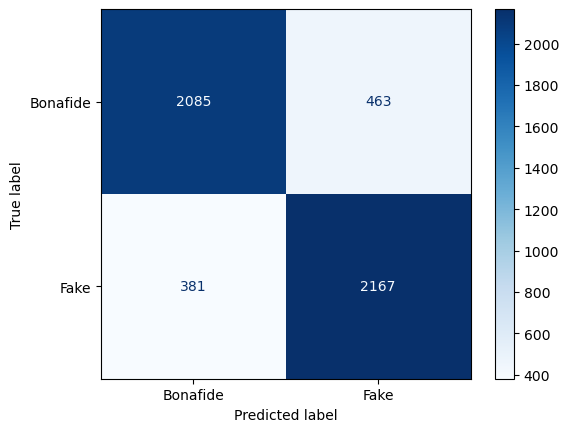

In [4]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_dev)

rf_cf = confusion_matrix(y_dev, y_pred_rf)
rf_confusion = ConfusionMatrixDisplay(confusion_matrix=rf_cf, display_labels=["Bonafide", "Fake"])
rf_confusion.plot(cmap="Blues")

val_acc_rf = accuracy_score(y_dev, y_pred_rf)
print(f"Accuracy: {val_acc_rf * 100:.2f}%")

### SVM

Accuracy: 82.85%


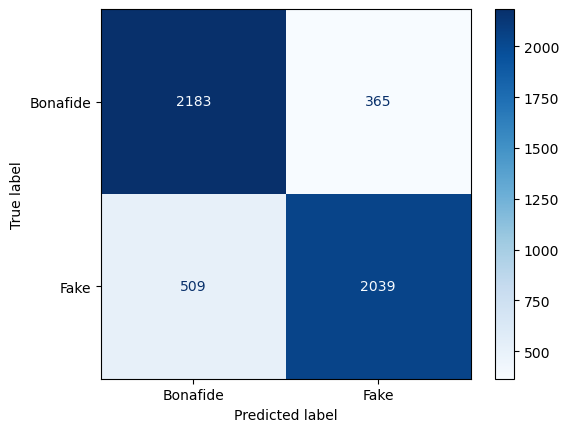

In [5]:
# Initialize and train the SVM model
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_dev)

svm_cf = confusion_matrix(y_dev, y_pred_svm)
svm_confusion = ConfusionMatrixDisplay(confusion_matrix=svm_cf, display_labels=["Bonafide", "Fake"])
svm_confusion.plot(cmap="Blues")

val_acc_svm = accuracy_score(y_dev, y_pred_svm)
print(f"Accuracy: {val_acc_svm * 100:.2f}%")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Validation Accuracy: 80.79%


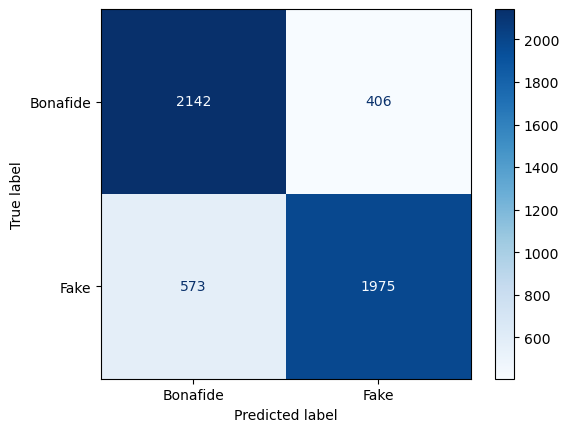

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Test different kernels
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Gamma for RBF kernel
}

# Initialize SVM model
svm = SVC(probability=True)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the validation set
y_pred_svm = best_svm.predict(X_dev)

# Confusion matrix
svm_cf = confusion_matrix(y_dev, y_pred_svm)
svm_confusion = ConfusionMatrixDisplay(confusion_matrix=svm_cf, display_labels=["Bonafide", "Fake"])
svm_confusion.plot(cmap="Blues")

# Accuracy
val_acc_svm = accuracy_score(y_dev, y_pred_svm)
print(f"Validation Accuracy: {val_acc_svm * 100:.2f}%")
